In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("D:/data.csv")
df.columns = df.columns.str.strip() 
df.drop(['customerID'], axis=1, inplace=True)
print(df.head())
# Remove rows with blank TotalCharges
df = df[df["TotalCharges"] != ' ']

# Convert TotalCharges to float
df["TotalCharges"] = df["TotalCharges"].astype(float)

# Drop rows where tenure is 0
df.drop(labels=df[df["tenure"] == 0].index, axis=0, inplace=True)

# Fill any remaining missing values in TotalCharges with mean
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

# Show basic info
print(f"Dataset shape: {df.shape[0]} rows and {df.shape[1]} columns\n")
print(" Data Types & Nulls:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Churn distribution
print("\nChurn Value Counts:")
print(df['Churn'].value_counts())

# Churn percentage
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("\nChurn Percentage Distribution:")
print(churn_rate)

# Numerical summary
print("\nNumerical Summary:")
print(df.describe())

# Categorical summary
print("\nCategorical Summary:")
print(df.describe(include='object'))

df["InternetService"].describe()


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

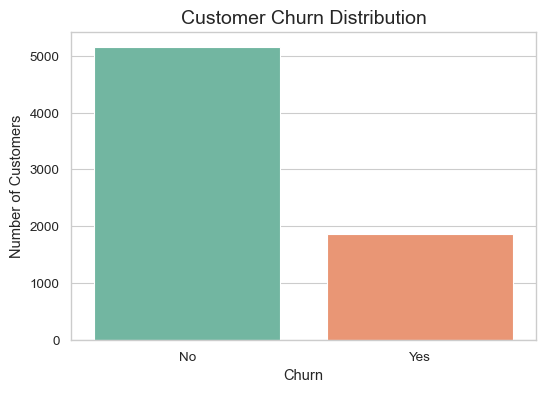

In [68]:
#using seaborn/matplot(Barchart)
# Set style
sns.set_style("whitegrid")

# Set figure size
plt.figure(figsize=(6, 4))

# Countplot
sns.countplot(x='Churn', data=df, palette='Set2')

# Add title and labels
plt.title("Customer Churn Distribution", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

# Show plot
plt.show()



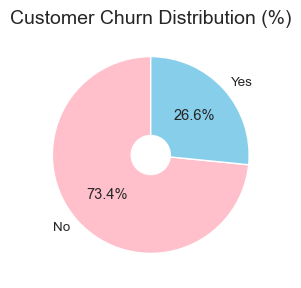

In [95]:
#matplotlib(Pie-chart)

# Value counts for Churn
churn_counts = df['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values
colors = ['pink', 'skyblue']

# Plot pie chart
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Draw circle for donut shape
centre_circle = plt.Circle((0, 0), 0.20, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title
plt.title("Customer Churn Distribution (%)", fontsize=14)
plt.tight_layout()
plt.show()


In [71]:
print("Gender Wise Count of non-churned customers : ")
df[df["Churn"] == "No"].groupby("gender")["Churn"].count()


Gender Wise Count of non-churned customers : 


gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [44]:
print("Gender Wise Count of churned customers : ")
df[df["Churn"] == "Yes"].groupby("gender")["Churn"].count()


Gender Wise Count of churned customers : 


gender
Female    939
Male      930
Name: Churn, dtype: int64

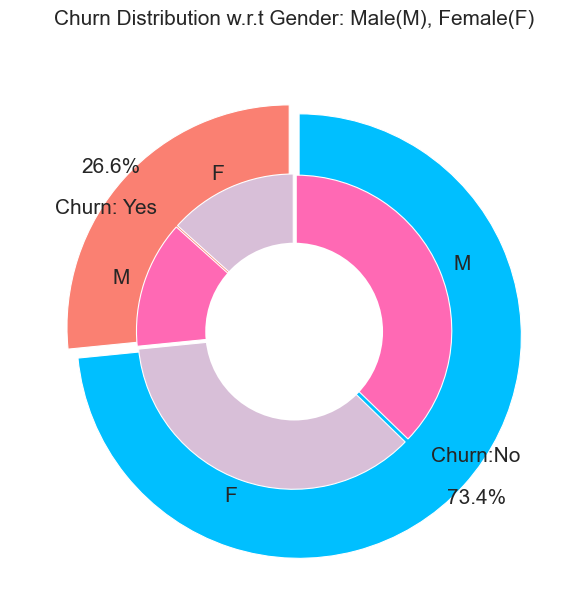

In [73]:
#nested circular donut(matplot)
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['salmon', 'deepskyblue']
colors_gender = ['thistle','hotpink', 'thistle','hotpink']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),4,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()


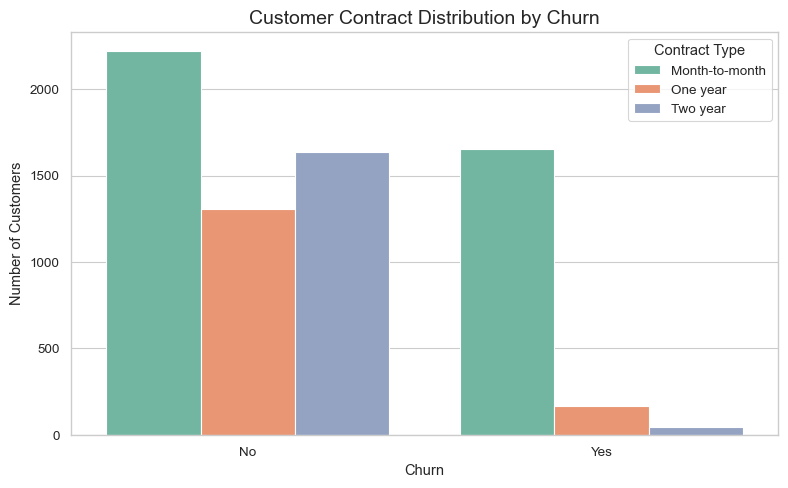

In [96]:

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn', hue='Contract', palette='Set2')

plt.title("Customer Contract Distribution by Churn", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.legend(title="Contract Type")
plt.tight_layout()
plt.show()

In [76]:
print("Male customers churn behavior based on Internet service type")
df[df["gender"] == "Male"][["InternetService", "Churn"]].value_counts()


Male customers churn behavior based on Internet service type


InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [61]:
print("Female customers churn behavior based on Internet service type")
df[df["gender"] == "Female"][["InternetService", "Churn"]].value_counts()


Female customers churn behavior based on Internet service type


InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

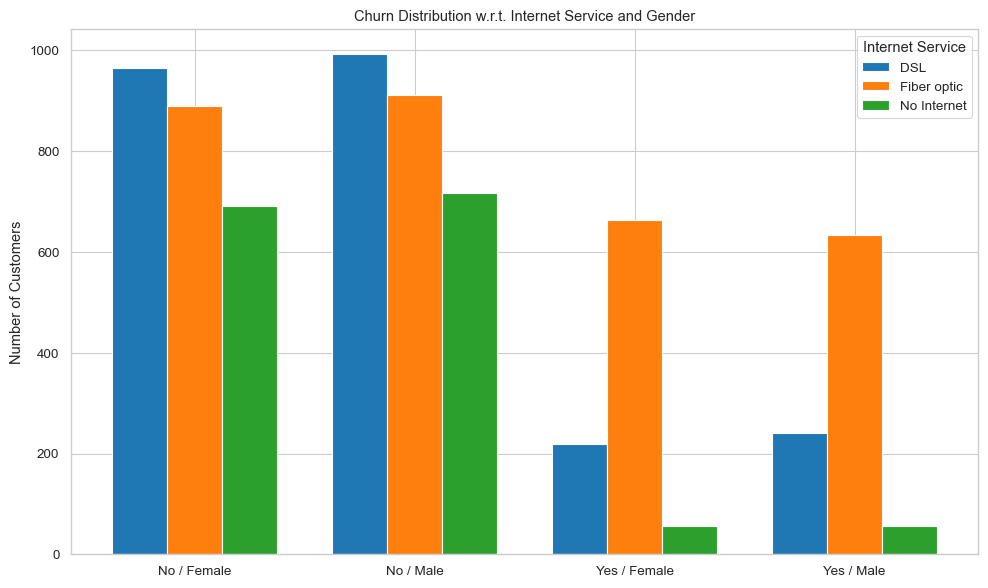

In [78]:

labels = ['No / Female', 'No / Male', 'Yes / Female', 'Yes / Male']
DSL = [965, 992, 219, 240]
Fiber = [889, 910, 664, 633]
NoInternet = [690, 717, 56, 57]

x = np.arange(len(labels))  # label locations
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, DSL, width, label='DSL')
ax.bar(x, Fiber, width, label='Fiber optic')
ax.bar(x + width, NoInternet, width, label='No Internet')

ax.set_ylabel('Number of Customers')
ax.set_title('Churn Distribution w.r.t. Internet Service and Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='Internet Service')
plt.tight_layout()
plt.show()


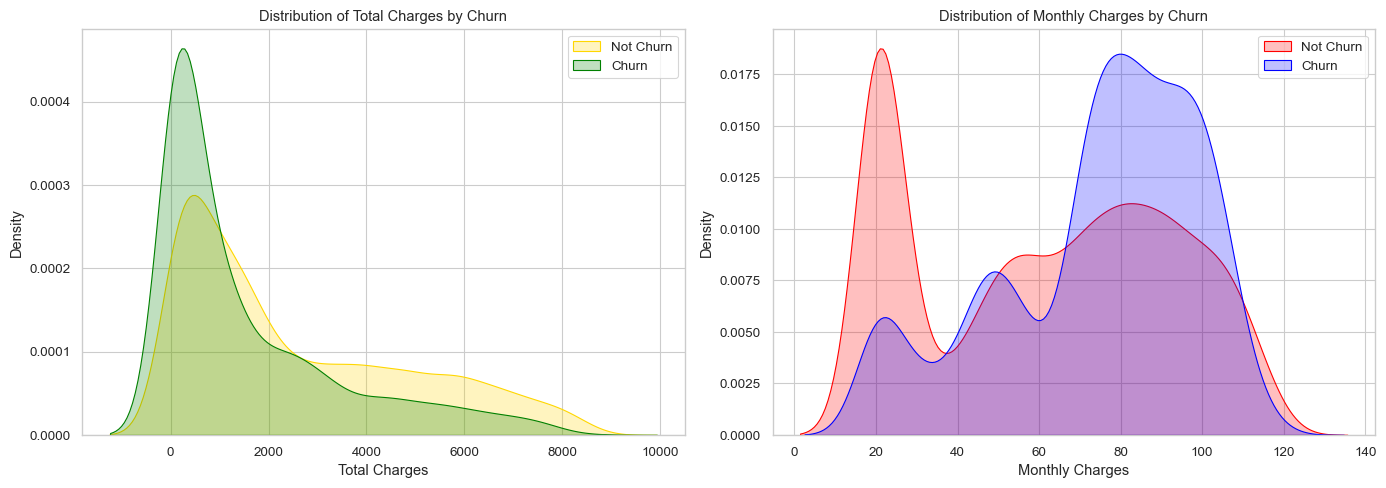

In [80]:
#KDE Using seaborn/matplot
# Set Seaborn context
sns.set_context("paper", font_scale=1.1)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# --- Plot 1: Total Charges ---
sns.kdeplot(df.TotalCharges[df["Churn"] == 'No'],
            color="gold", shade=True, ax=axes[0])
sns.kdeplot(df.TotalCharges[df["Churn"] == 'Yes'],
            color="green", shade=True, ax=axes[0])
axes[0].legend(["Not Churn", "Churn"], loc='upper right')
axes[0].set_title('Distribution of Total Charges by Churn')
axes[0].set_xlabel('Total Charges')
axes[0].set_ylabel('Density')

# --- Plot 2: Monthly Charges ---
sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'No'],
            color="red", shade=True, ax=axes[1])
sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'Yes'],
            color="blue", shade=True, ax=axes[1])
axes[1].legend(["Not Churn", "Churn"], loc='upper right')
axes[1].set_title('Distribution of Monthly Charges by Churn')
axes[1].set_xlabel('Monthly Charges')
axes[1].set_ylabel('Density')
plt.tight_layout()
plt.show()


C:\Users\jutt computer\AppData\Local\Temp\ipykernel_8004\472517658.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette='Set1')


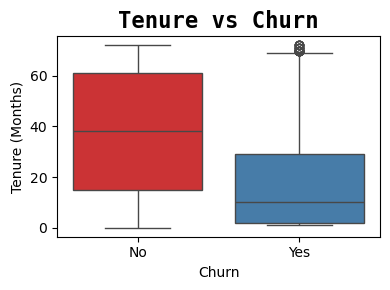

In [7]:
import pandas as pd
df = pd.read_csv("D:/data.csv")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,3))

sns.boxplot(data=df, x='Churn', y='tenure', palette='Set1')  

plt.title('Tenure vs Churn', fontsize=16, fontweight='bold', fontfamily='monospace')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')

plt.tight_layout()
plt.show()



In [101]:
print(df.isnull().sum())


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [102]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum()) 


0


In [116]:
df.dropna(inplace=True)
print(df.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [9]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Identify all object-type (categorical) columns
cat_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", cat_cols)

# Apply Label Encoding to each categorical column
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [119]:
print(df_encoded.head())
print(df_encoded.dtypes)


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

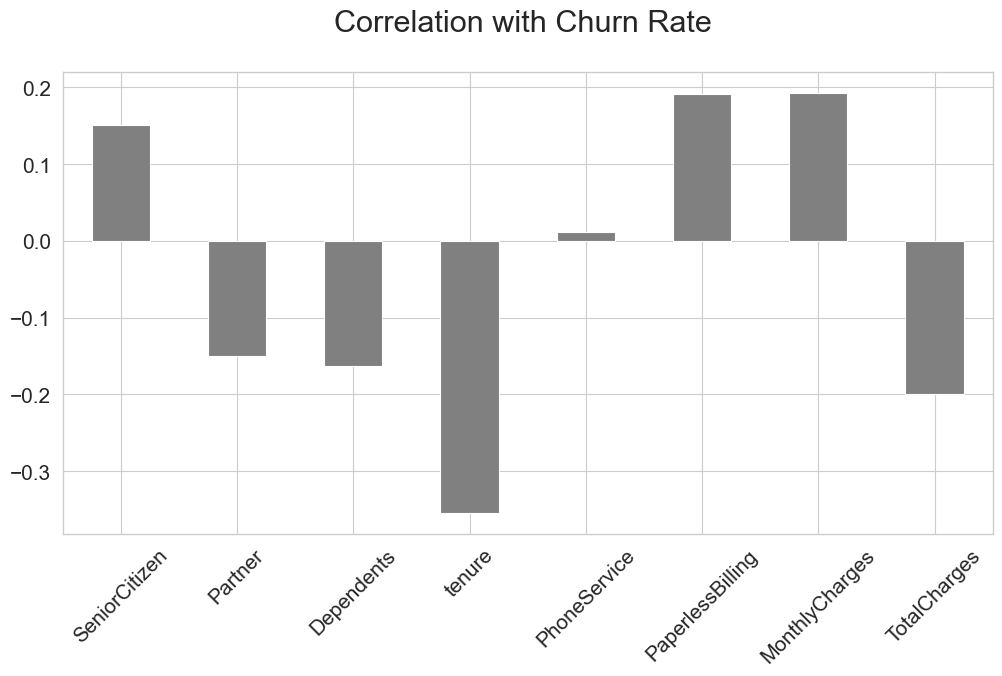

In [131]:

df_encoded = df.copy()
le = LabelEncoder()

# Encode all object columns
cat_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
  df_encoded[col] = le.fit_transform(df_encoded[col])

# Clean 'TotalCharges' column
df_encoded['TotalCharges'] = pd.to_numeric(df_encoded['TotalCharges'], errors='coerce')
df_encoded.dropna(inplace=True)

# Correlation plot
df1 = df_encoded[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

correlations = df1.corrwith(df_encoded['Churn'])
correlations = correlations[correlations != 1]
positive_correlations = correlations[correlations > 0].sort_values(ascending=False)
negative_correlations = correlations[correlations < 0].sort_values(ascending=False)

correlations.plot.bar(
    figsize=(12, 6),
    fontsize=15,
    color='grey',
    rot=45,
    grid=True
)
plt.title('Correlation with Churn Rate \n',
          horizontalalignment="center", fontstyle="normal",
          fontsize="22", fontfamily="sans-serif")
plt.show()


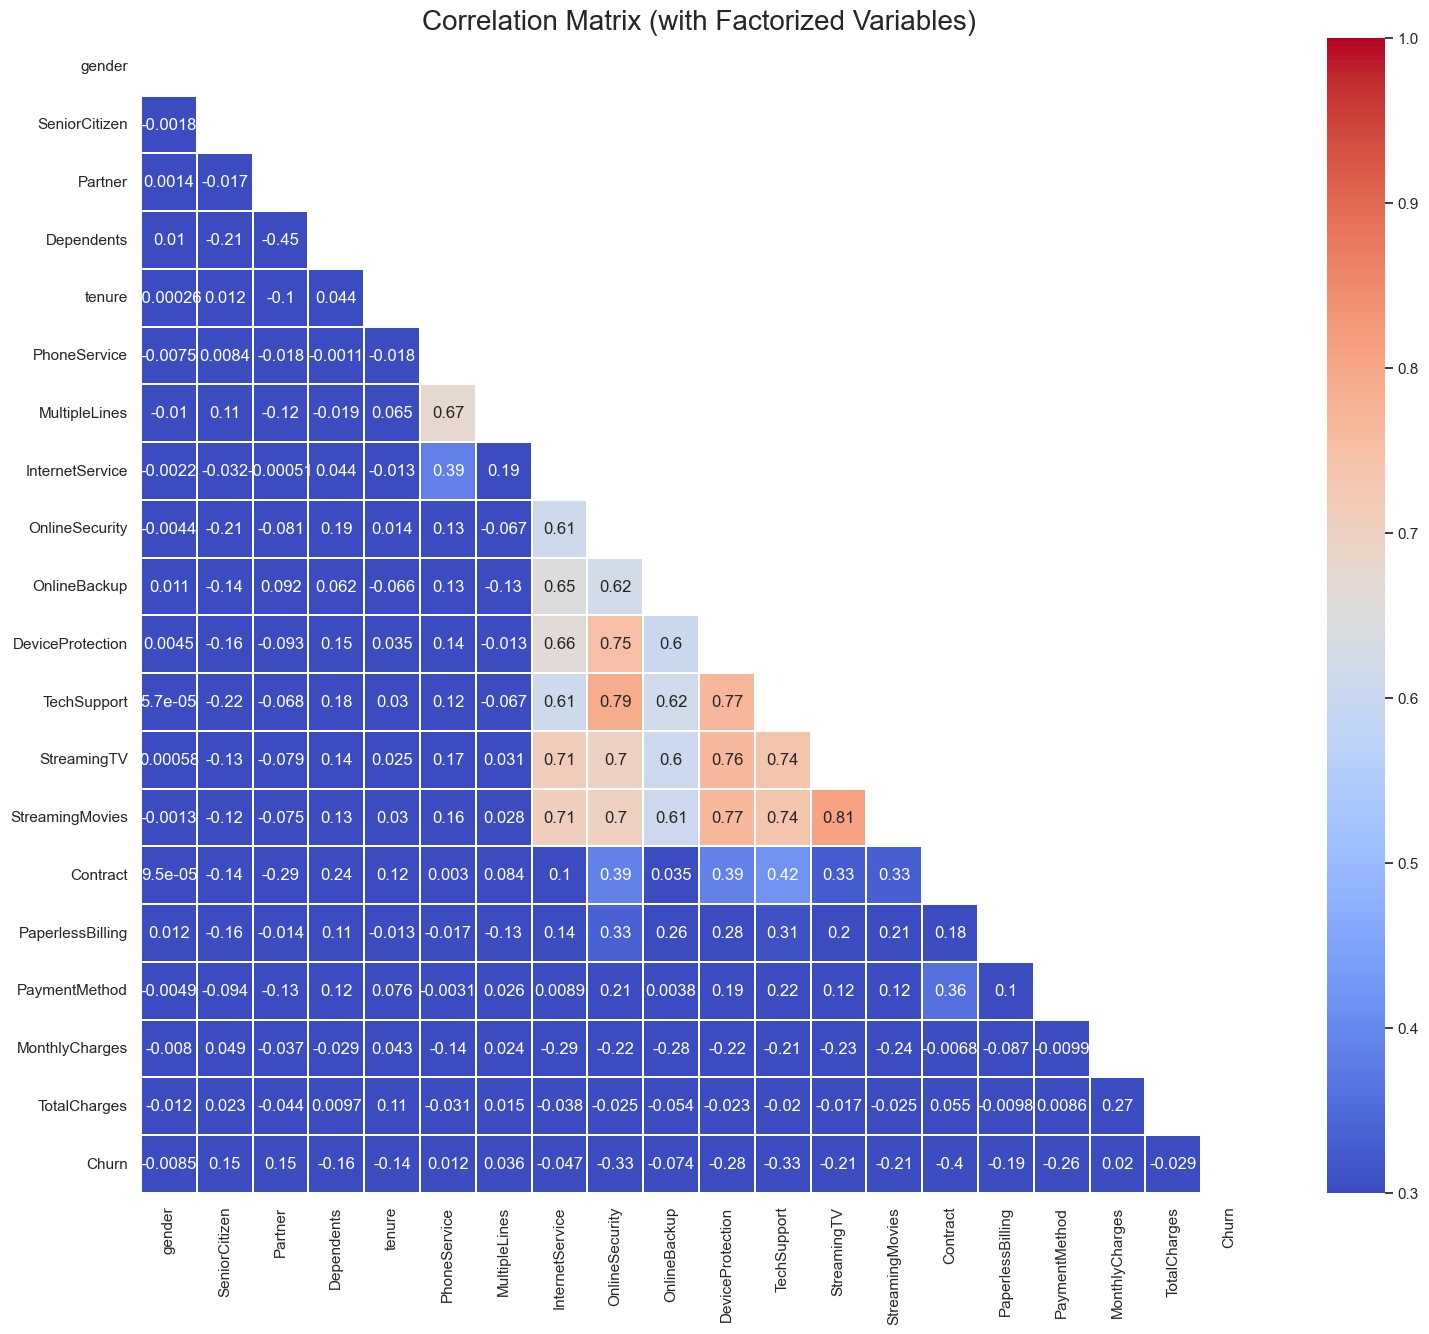

In [133]:
sns.set(style="white")
plt.figure(figsize=(18, 15))
# Convert all columns to numeric codes before correlation
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Heatmap
ax = sns.heatmap(
    corr, 
    mask=mask, 
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    annot=True, 
    linewidths=.2, 
    cmap='coolwarm', 
    vmin=0.3, vmax=1
)
plt.title("Correlation Matrix (with Factorized Variables)", fontsize=20)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

df = df_encoded.copy()
X = df.drop('Churn', axis=1) 
y = df['Churn']               

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shapes
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)


Training Features Shape: (5634, 20)
Test Features Shape: (1409, 20)
Training Labels Shape: (5634,)
Test Labels Shape: (1409,)


In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Before Scaling:")
print(X_train.iloc[0])  
print("\nAfter Scaling:")
print(X_train_scaled[0])  


Before Scaling:
gender                 1.00
SeniorCitizen          0.00
Partner                1.00
Dependents             1.00
tenure                65.00
PhoneService           1.00
MultipleLines          2.00
InternetService        1.00
OnlineSecurity         2.00
OnlineBackup           2.00
DeviceProtection       2.00
TechSupport            2.00
StreamingTV            0.00
StreamingMovies        0.00
Contract               2.00
PaperlessBilling       0.00
PaymentMethod          1.00
MonthlyCharges        94.55
TotalCharges        6078.75
Name: 1413, dtype: float64

After Scaling:
[ 0.99627361 -0.43931886  1.02831173  1.5291432   1.3218163   0.32754155
  1.11213912  0.17532614  1.40766185  1.22937906  1.24162994  1.3835458
 -1.12030207 -1.12308933  1.56711883 -1.21302973 -0.53531773  0.98155578
  1.6599004 ]


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize models
log_model = LogisticRegression()
tree_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train models
log_model.fit(X_train_scaled, y_train)
tree_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
log_pred = log_model.predict(X_test_scaled)
tree_pred = tree_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

# Evaluate models
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))

print("\n=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


=== Logistic Regression ===
Accuracy: 0.7938877043354655
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407


=== Decision Tree ===
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1033
           1       0.47      0.50      0.48       374

    accuracy                           0.71      1407
   macro avg       0.64      0.65      0.64      1407
weighted avg       0.72      0.71      0.72      1407


=== Random Forest ===
Accuracy: 0.7818052594171997
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy         

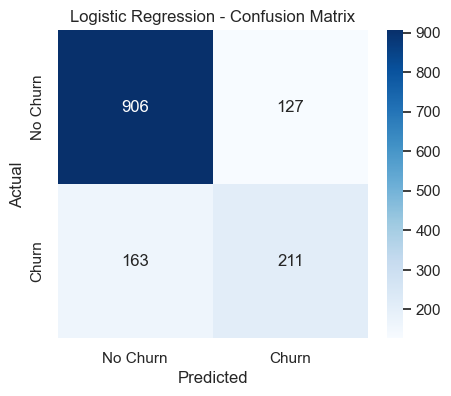

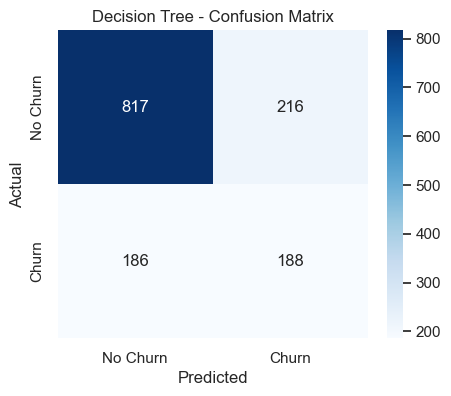

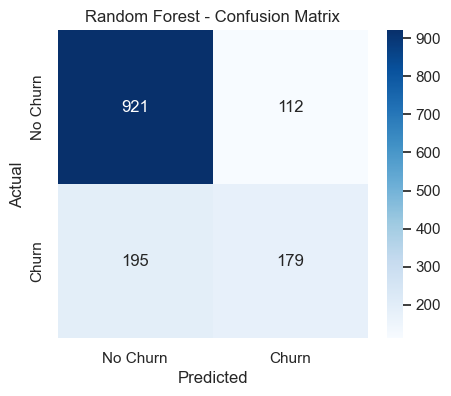

In [143]:
from sklearn.metrics import confusion_matrix

# Create a function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot for each model
plot_conf_matrix(y_test, log_pred, "Logistic Regression - Confusion Matrix")
plot_conf_matrix(y_test, tree_pred, "Decision Tree - Confusion Matrix")
plot_conf_matrix(y_test, rf_pred, "Random Forest - Confusion Matrix")


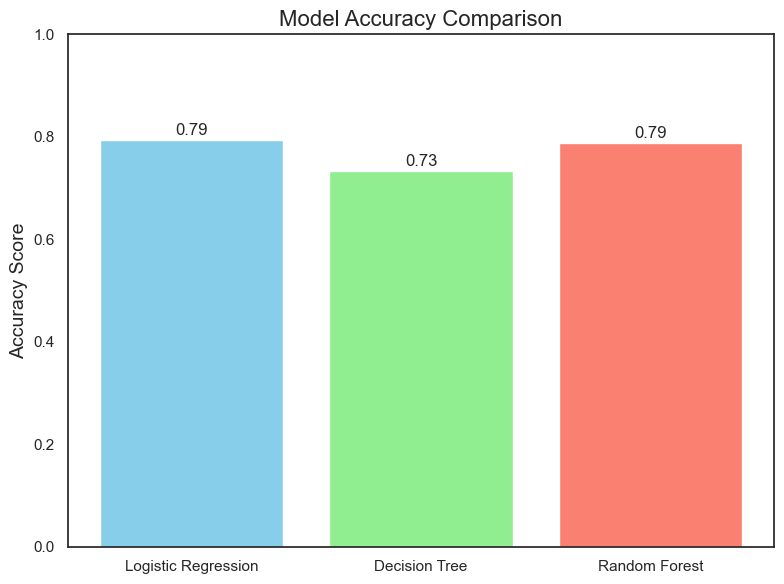

In [149]:

log_acc = accuracy_score(y_test, log_pred)
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [log_acc, tree_acc, rf_acc]

plt.figure(figsize=(8,6))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=14)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, round(yval, 2), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [153]:
# Create a copy of any row from X_train
sample = X_train.iloc[0].copy()

# Modify just a few values
sample['MonthlyCharges'] = 80
sample['tenure'] = 5
sample['SeniorCitizen'] = 1

# Convert to DataFrame
new_customer = pd.DataFrame([sample])

# Scale and predict
new_customer_scaled = scaler.transform(new_customer)
prediction = log_model.predict(new_customer_scaled)

print("Churn Prediction(log):", "Yes" if prediction[0] == 1 else "No")
prediction = tree_model.predict(new_customer_scaled)
print("Churn Prediction(tree):", "Yes" if prediction[0] == 1 else "No")
prediction = rf_model.predict(new_customer_scaled) 
print("Churn Prediction(rf):", "Yes" if prediction[0] == 1 else "No")

Churn Prediction(log): No
Churn Prediction(tree): Yes
Churn Prediction(rf): No
